# Exercise: Graduate Admission (AI for Engineer 2/2020)

![](https://campus.campus-star.com/app/uploads/2018/02/exam-stu121.jpg)

## Introducing the Dataset

This dataset includes data for graduate degrees admission (Masters), originally found on "Kaggle" (https://www.kaggle.com/mohansacharya/graduate-admissions)

The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit

First read of the datasets' columns we can conclude some few basic facts and assumptions: 
    
    1.Serial No. is just for providing a unique index and is thus ignored in any analysis, as it's improbable that it indicates an order of admission in terms of time or priority.
    
    2.Almost all data are assumed to be collerated to the chance of admission.

In a following section while "Exploring the Data", we will go through each variable individually.
       


## Objectives

    1.To have an overview look at the sample and analyze the students that apply to graduate degree programs.

    2.To create a prediction model that estimates chance of admission for new prospect students.

# First Steps

## Importing Modules and Reading the .csv File

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
%matplotlib inline
pd.get_option('display.width')
pd.set_option('display.width', 120)
sns.set(rc={'figure.figsize':(12.7,8.27)})
pd.options.mode.chained_assignment = None

In [0]:
data = pd.read_csv('https://github.com/kaopanboonyuen/myMLPractice/raw/master/GraduateAdmission/data/Admission_Predict_Ver1.1.csv')

In [0]:
data.drop('Serial No.', inplace=True, axis=1)
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

## Exploring the Data

### In General 

In [4]:
## Head of the data
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
## Correlation coeffecients 
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1, 'Correlation Factors Heat Map')

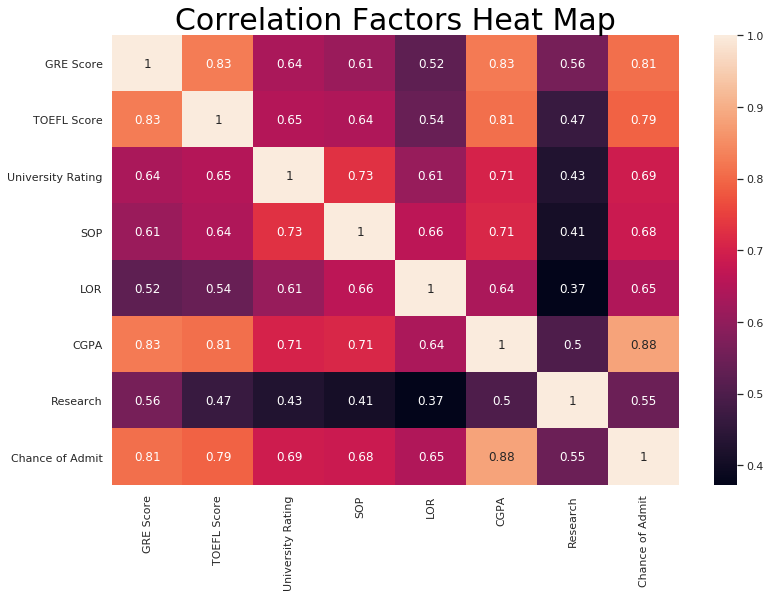

In [7]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='30')


### GRE Scores

The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : Analytical Writing, Verbal and Quantitative.

The test's maximum score is 340 and minimum is 260, and according to an official GRE score document, the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 306.35 which rounds to 306 with an average standard deviation of 7.19

source: https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [8]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


The sample's GRE score mean is 316 which is a little bit higher than the mean mentioned previously (306)

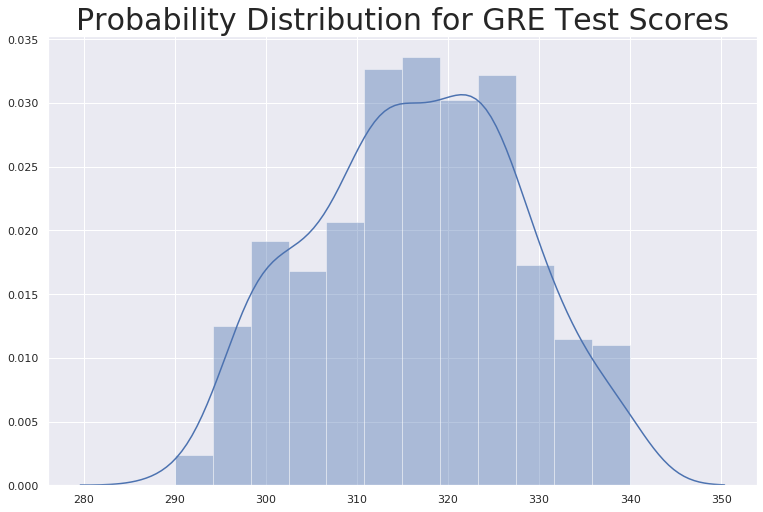

In [9]:
# # Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='30')
plt.show()

As the distribution plot shows, the GRE test scores are somehow normally distributed.

In [10]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
TOEFL Score,0.827200
University Rating,0.635376
SOP,0.613498
LOR,0.524679
CGPA,0.825878
Research,0.563398
Chance of Admit,0.810351


### TOEFL Score


Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing, each one of them is out of 30, yielding a maximum score of 120 and a minimum of 0.

ETS (the institute that offers the test) recorded a mean score of 82.6 with a standard deviation of 19.5 (https://www.ets.org/s/toefl/pdf/94227_unlweb.pdf).

Although this is the mean for a wide range of students from all around the world that took the test for different purposes, as students applying for an engineering graduate degree might have a higher average than high school students.







In [11]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


It's evident that the sample over performs in the TOEFL.

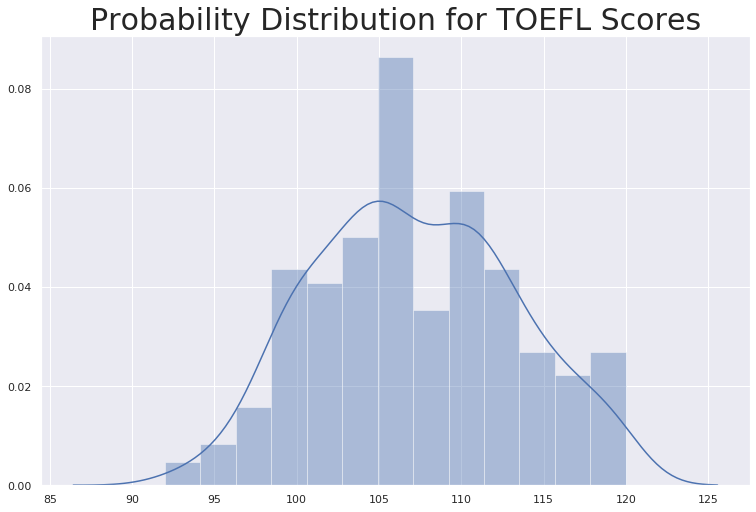

In [12]:
# Probability distribution for TOEFL Scores
sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='30')
plt.show()

### CGPA

Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

In [13]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


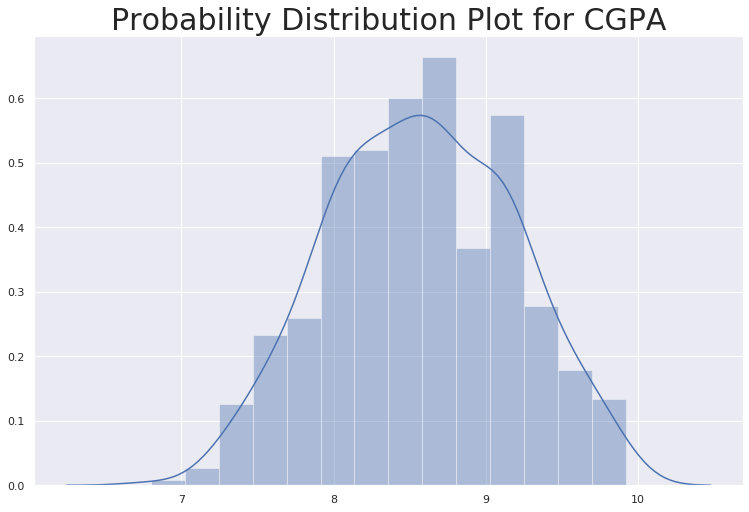

In [14]:
sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='30')
plt.show()

### Research

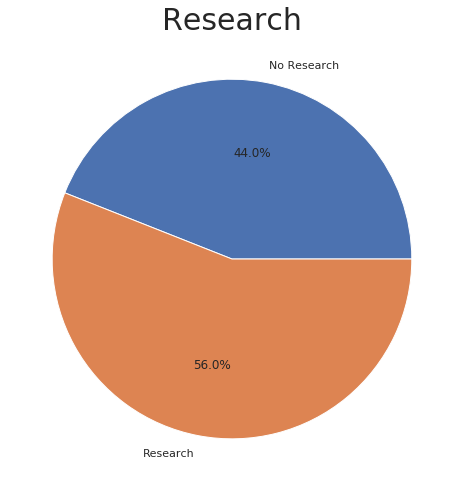

In [15]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

### University Rating

The rating of the university the student completed his undergraduate degree from.

In [16]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,34
2,126
3,162
4,105
5,73


How good the university is a value between 1 and 5 in integer increment , and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

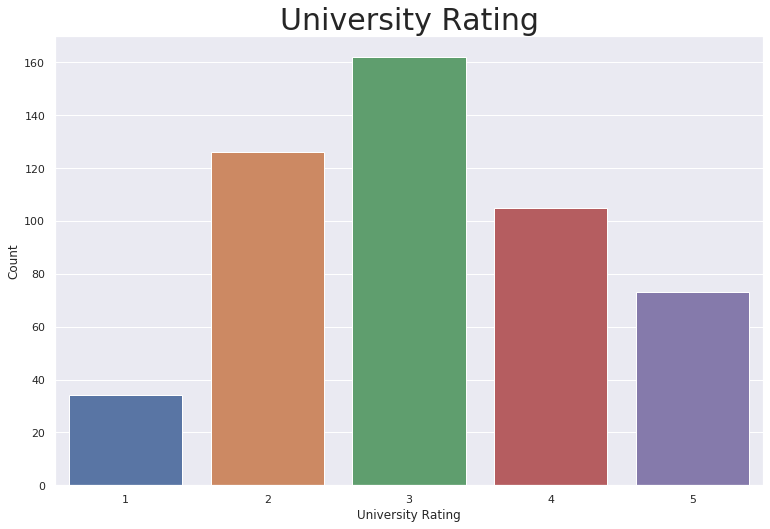

In [17]:
# Barplot for the distribution of the University Rating
sns.barplot(University_Rating.index, University_Rating['Count']).set_title('University Rating', size='30')
plt.show()

### SOP

Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

In [18]:
#Isolating and describing
SOP = pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,25
2.0,43
2.5,64
3.0,80
3.5,88
4.0,89
4.5,63
5.0,42


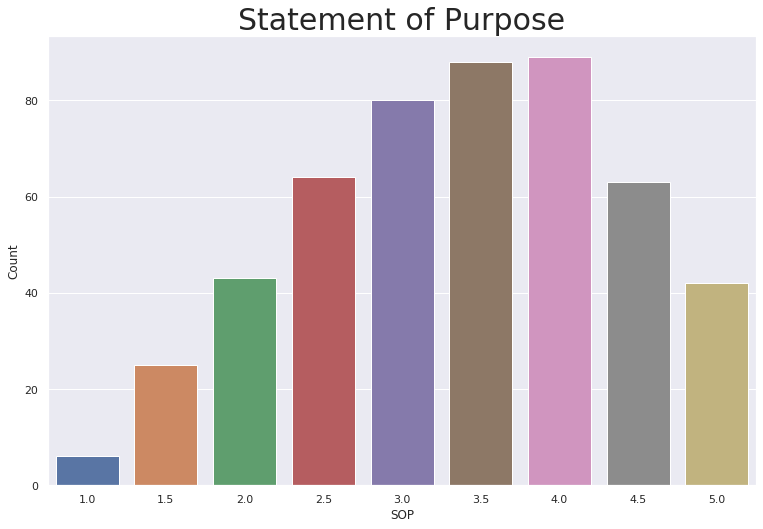

In [19]:
# Barplot for SOP 
sns.barplot(SOP.index, SOP['Count']).set_title('Statement of Purpose', size='30')
plt.show()

Exploring this variable, it's ordered from 1 to 5 with 0.5 increments, although the criteria for assessment isn't specified, which will make it harder to deal with new entries.

### LOR

Letter of Recommendation (LOR) is a letter written by a person that knows the student and recommends that the university accept his admission, this person can be a professor in his undergraduate degree or a professional whom the student have worked with.

In [20]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,11
2.0,46
2.5,50
3.0,99
3.5,86
4.0,94
4.5,63
5.0,50


THE LOR is ordered same as the SOP

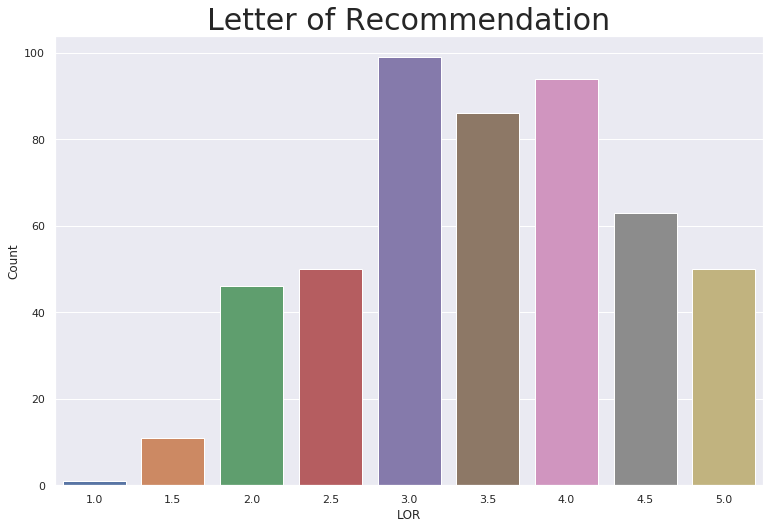

In [21]:
# Distribution of the LOR
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='30')
plt.show()

### Are students in this sample too good?

First looking at the students LOR, SOP and University Ratings, most students score (4-5) on the scales, not many scored (1-2.5).

Nonetheless, comparing means for their GRE and TOEFL scores, which are of a universal criteria, they clearly perform better than the average student as the ETS states.

To conclude, it seems only wise to consider the sample to be somehow above average.


## Chance of Admission

Let's first take a review on the chances of admission.

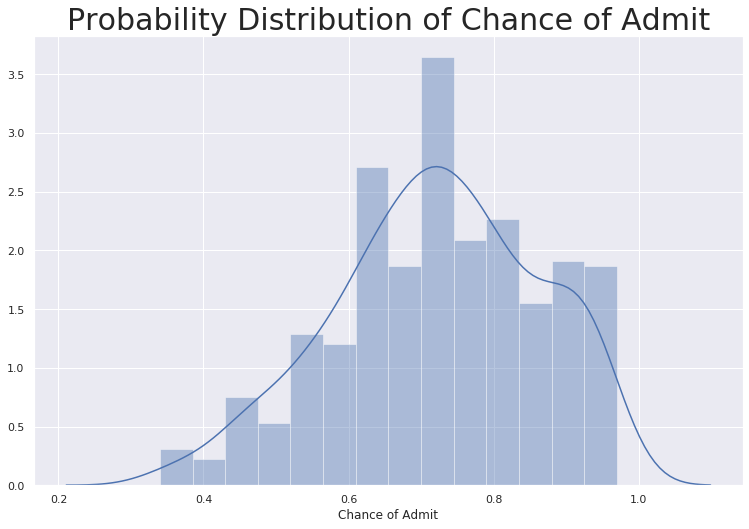

In [22]:
data['Chance of Admit']
sns.distplot(data['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='30')
plt.show()

In [23]:
data.describe()['Chance of Admit']

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

And since one of our goals is to predict the chance of admission, let's take a look on how the different variables correlate with it.

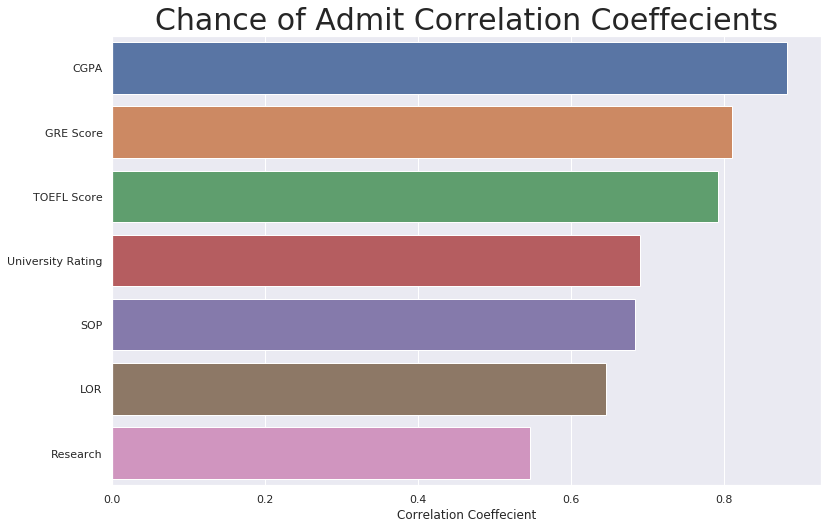

In [24]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='30')
plt.show()

It is evident that the most contribution factors to the chance of admission are CGPA, GRE Score and TOEFL Score.

In [25]:
COA_corr

,Correlation Coeffecient
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


# Prediction Models

## Preparing the data

In [0]:
X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [0]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE Score', 'TOEFL Score']] = scaler.fit_transform(X[['CGPA','GRE Score', 'TOEFL Score']])

In [0]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

## Linear Regression (All Features)

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.8126327365181197 
Linear Regression MSE: 0.00351908697457344, 
Linear Regression RMSE:0.05932189287753249


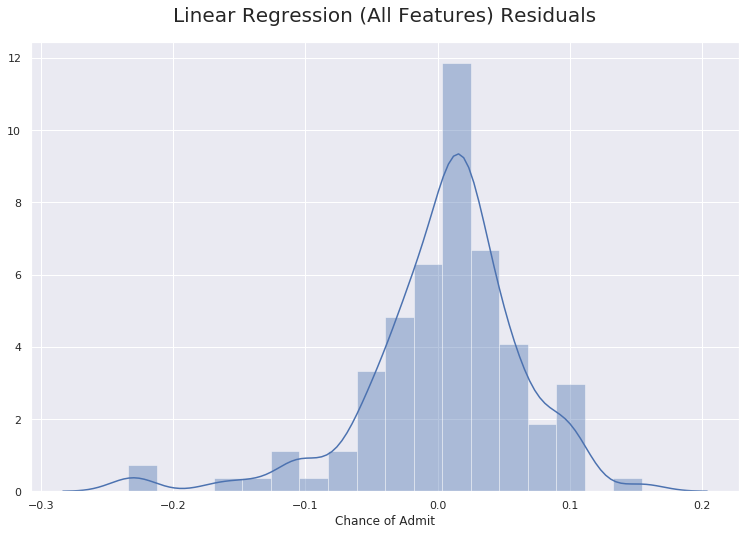

In [32]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - lr_predictions))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

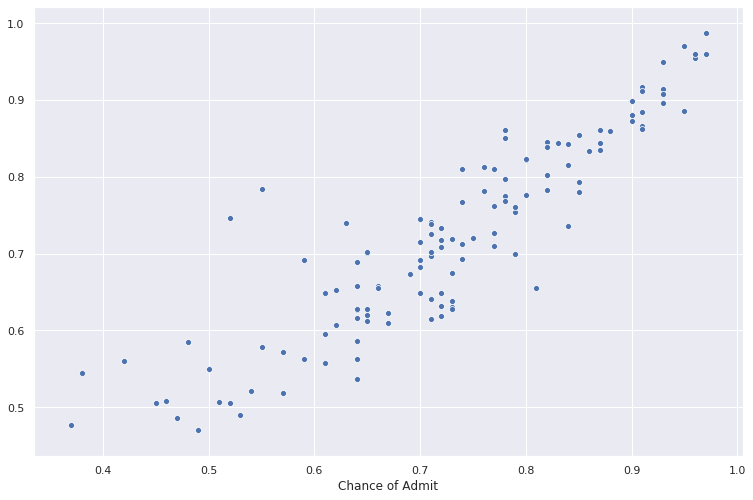

In [33]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
# sns.(y_test, lr_predictions)
sns.scatterplot(y_test, lr_predictions)
plt.show()

## Linear Regression (Selected Features)

In [0]:
X_selected = X[['CGPA', 'GRE Score', 'TOEFL Score']]
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_selected, y, random_state=101)

In [0]:
lr_sel = LinearRegression()
lr_sel.fit(X_sel_train, y_train)
lr_sel_predictions = lr_sel.predict(X_sel_test)

In [36]:
lr_sel_r2 = r2_score(y_test, lr_sel_predictions)
lr_sel_mse = mean_squared_error(y_test, lr_sel_predictions)
lr_sel_rmse = np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7891805958364757 
Linear Regression MSE: 0.003959559452342314, 
Linear Regression RMSE:0.06292503041193
